<a href="https://colab.research.google.com/github/febinurfajar19/Python-Programming/blob/main/Tugas_Pertemuan_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

In [108]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from PIL import ImageFilter
from imutils import paths
import numpy as np
import os

In [109]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset_daun")
data = []
labels = []

[INFO] loading images...


In [110]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 128x128 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
  image = Image.open(imagePath)
  sharpened1 = image.filter(ImageFilter.SHARPEN)
  image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
  data.append(image)

	# extract the class label from the file path and update the
	# labels list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [111]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [112]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [113]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [114]:
# perform a training and testing split, using 25% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 128, 128, 3)
(147, 128, 128, 3)


In [115]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 28800)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               2880100   
_________________________________________________________________
dense_15 (Dense)             (None, 5)               

In [116]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=35, batch_size=32)

[INFO] training network...
Epoch 1/35
14/14 [==============================] - 5s 354ms/step - loss: 3.2079 - accuracy: 0.1804 - val_loss: 1.6166 - val_accuracy: 0.1905
Epoch 2/35
14/14 [==============================] - 5s 346ms/step - loss: 1.5703 - accuracy: 0.2671 - val_loss: 1.5404 - val_accuracy: 0.4354
Epoch 3/35
14/14 [==============================] - 5s 349ms/step - loss: 1.4514 - accuracy: 0.3219 - val_loss: 1.3693 - val_accuracy: 0.4354
Epoch 4/35
14/14 [==============================] - 5s 349ms/step - loss: 1.1792 - accuracy: 0.5708 - val_loss: 1.1309 - val_accuracy: 0.5510
Epoch 5/35
14/14 [==============================] - 5s 351ms/step - loss: 0.8900 - accuracy: 0.6963 - val_loss: 1.0092 - val_accuracy: 0.5850
Epoch 6/35
14/14 [==============================] - 5s 351ms/step - loss: 0.8186 - accuracy: 0.6895 - val_loss: 0.9555 - val_accuracy: 0.5986
Epoch 7/35
14/14 [==============================] - 5s 351ms/step - loss: 0.6124 - accuracy: 0.7922 - val_loss: 0.8363 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


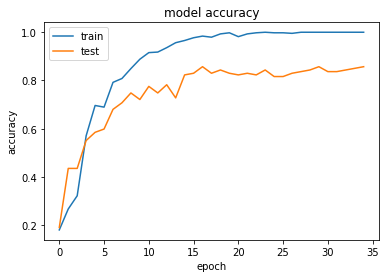

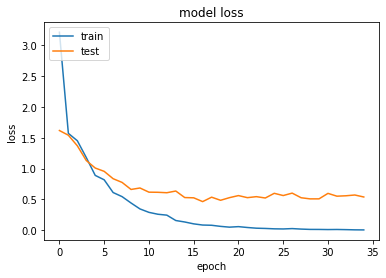

In [117]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [118]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.80      0.89      0.84        27
      GMB_03       0.87      0.96      0.92        28
      GMB_05       0.87      0.84      0.86        32
      GMB_07       0.81      0.71      0.76        31
      GMB_09       0.93      0.90      0.91        29

    accuracy                           0.86       147
   macro avg       0.86      0.86      0.86       147
weighted avg       0.86      0.86      0.86       147

